In [ ]:
 pip install gymnasium

In [ ]:
from time import sleep
import numpy as np
from IPython.display import clear_output
import gymnasium as gym
from gymnasium.envs.registration import register
import torch
from torch import nn
from matplotlib.pyplot import plot


In [ ]:
from matplotlib.pyplot import plot

In [ ]:
#Give colab access to your google drive:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#Change current directory to folder with MiniPacMan
%cd /gdrive/MyDrive/CS181V/Spring2025/REINFORCE

/gdrive/MyDrive/CS181V/Spring2025/REINFORCE


In [ ]:
#Import MiniPacMan environment class definition
from MiniPacManGym import MiniPacManEnv

In [ ]:
#Register MiniPacMan in your gymnasium environments
register(
    id="MiniPacMan-v0",
    entry_point=MiniPacManEnv,  # Update with your actual module path
    max_episode_steps=20          # You can also set a default here
)

In [ ]:
#Create a MiniPacMan gymnasium environment
env = gym.make("MiniPacMan-v0", render_mode="human", frozen_ghost=False)

In [ ]:
class PolicyNetwork(nn.Module):
    def __init__(self):
      super().__init__()
      self.linear1=nn.Linear(36,32)
      self.linear2=nn.Linear(32,16)
      self.linear3=nn.Linear(16,4)

    def forward(self, x):
      x=nn.Flatten()(x)
      x=self.linear1(x)
      x=nn.ReLU()(x)
      x=self.linear2(x)
      x=nn.ReLU()(x)
      x=self.linear3(x)
      x=nn.Softmax(dim=1)(x)
      return x



In [ ]:
pi=PolicyNetwork()

In [1]:
pi_optimizer = torch.optim.Adam(pi.parameters(), lr=0.01)

NameError: name 'torch' is not defined

In [ ]:
#set hyperparams
gamma=0.95
num_updates=200
num_trajectories=200
win_log=[]

for e in range(num_updates):
  B=[] #Buffer for trajectories
  wins=0


  for j in range(num_trajectories):
    new_obs,info=env.reset()
    new_obs=torch.tensor(new_obs,dtype=torch.float32)

    done=False
    truncated=False
    #T=[] #buffer for each trajectory
    log_probs=torch.tensor([])
    rewards=torch.tensor([])

    while not done and not truncated: #Loop for one episode
      obs=new_obs
      probs=pi(obs.reshape(1,-1))
      action=probs.multinomial(num_samples=1)
      action_prob=probs[0,action]#[0]
      log_prob=torch.log(action_prob)
      log_probs=torch.cat((log_probs,log_prob.reshape(1)))

      new_obs,reward, done, truncated, info=env.step(action)
      new_obs=torch.tensor(new_obs,dtype=torch.float32)
      #T.append((log_prob,reward))
      rewards=torch.cat((rewards,torch.tensor(reward).reshape(1)))

    #n=len(T)
    #log_probs,rewards=zip(*T)
    #log_probs=torch.cat(log_probs)

    #rewards=torch.tensor(rewards)
    discounts = torch.pow(gamma, torch.arange(rewards.shape[0], dtype=torch.float32))
    rewards_to_go = torch.flip(torch.cumsum(torch.flip(rewards * discounts, dims=[0]), dim=0), dims=[0]) / discounts
    #rewards_to_go = (rewards_to_go - rewards_to_go.mean())

    B.append(log_probs*rewards_to_go)
    wins+=(reward==10)

  B=torch.cat(B)
  loss=-B.mean()
  pi_optimizer.zero_grad()
  loss.backward()
  pi_optimizer.step()

  #periodic reporting:
  if e>0 and e%1==0:
    win_pct=wins/num_trajectories
    win_log+=[win_pct]
    print(f'episode: {e}, loss: {loss:.2f}, win percentage: {win_pct}')


episode: 1, loss: -12.43, win percentage: 0.01
episode: 2, loss: -12.34, win percentage: 0.01
episode: 3, loss: -13.21, win percentage: 0.0
episode: 4, loss: -13.07, win percentage: 0.0
episode: 5, loss: -12.85, win percentage: 0.005
episode: 6, loss: -13.09, win percentage: 0.0
episode: 7, loss: -12.93, win percentage: 0.0
episode: 8, loss: -12.67, win percentage: 0.005
episode: 9, loss: -13.12, win percentage: 0.0
episode: 10, loss: -12.86, win percentage: 0.005
episode: 11, loss: -12.38, win percentage: 0.01
episode: 12, loss: -12.85, win percentage: 0.0
episode: 13, loss: -12.97, win percentage: 0.0
episode: 14, loss: -12.81, win percentage: 0.0
episode: 15, loss: -12.82, win percentage: 0.0
episode: 16, loss: -12.05, win percentage: 0.01
episode: 17, loss: -11.74, win percentage: 0.01
episode: 18, loss: -12.53, win percentage: 0.005
episode: 19, loss: -11.26, win percentage: 0.02
episode: 20, loss: -10.88, win percentage: 0.03
episode: 21, loss: -10.49, win percentage: 0.03
episod

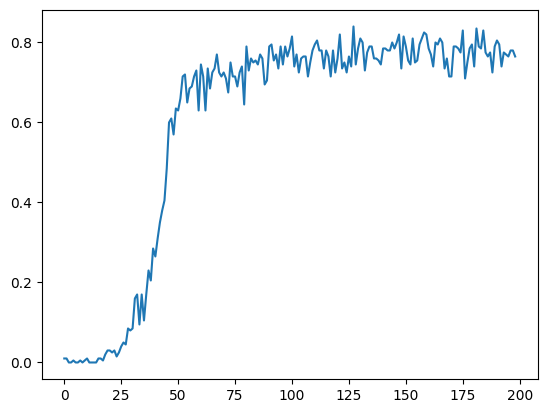

In [ ]:
plot(win_log)

In [ ]:
obs, info = env.reset()
done = False
truncated = False

while not done and not truncated:
    env.render()
    obs=torch.tensor(obs,dtype=torch.float32)
    action=pi(obs.reshape(1,-1)).multinomial(num_samples=1)
    obs, reward, done, truncated, info = env.step(action)
    sleep(1)
    clear_output(wait=True)

env.render()
env.close()

xxxxxx
x····x
x····x
x··ᗣ·x
x···ᗧx
xxxxxx

